Import statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Read the files

In [5]:
train = pd.read_csv('train.csv', sep = ',')
validate = pd.read_csv('validate.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')

print(f'len of train set: {len(train)}')
print(f'len of validate set: {len(validate)}')
print(f'len of test set: {len(test)}')

len of train set: 350000
len of validate set: 50000
len of test set: 100000


In [6]:
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,6,1337,40.38,6,9,5,0.017951,0.030202,0.250000,0
1,6,328,14.96,7,9,3,0.021341,0.045610,1.000000,0
2,4,70,79.09,4,1,0,0.214286,1.129857,0.266667,0
3,6,20,76.17,6,4,1,0.150000,3.808500,2.000000,0
4,5,291,95.98,4,9,2,0.082474,0.329828,0.166667,0


Check duplicate rows for all

In [7]:
print(train.duplicated().any())
print(validate.duplicated().any())
print(test.duplicated().any())

False
False
False


In [8]:
# check for missing values
columns = train.columns
for i in columns:
    if len(train[i][train[i].isnull()]):
        print(f'{i}: {len(train[i][train[i].isnull()])}')
    if len(validate[i][validate[i].isnull()]):
        print(f'{i}: {len(validate[i][validate[i].isnull()])}')
    if len(test[i][test[i].isnull()]):
        print(f'{i}: {len(test[i][test[i].isnull()])}')
    

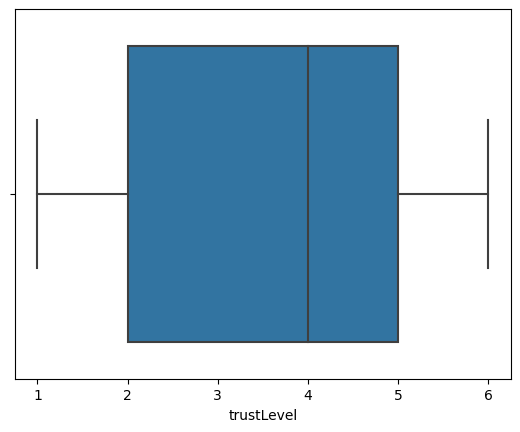

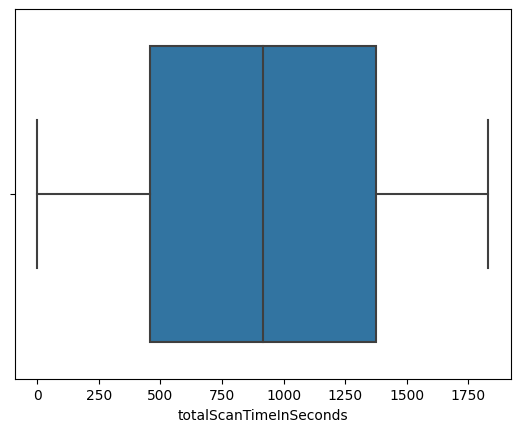

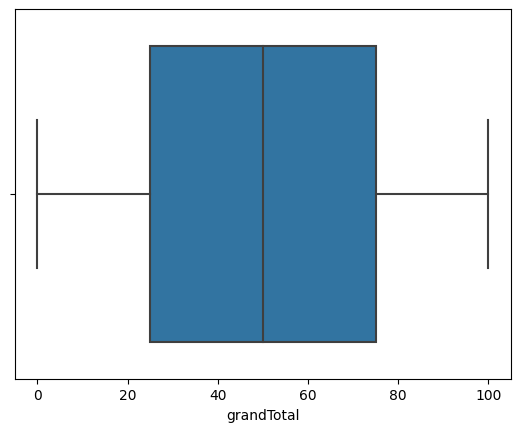

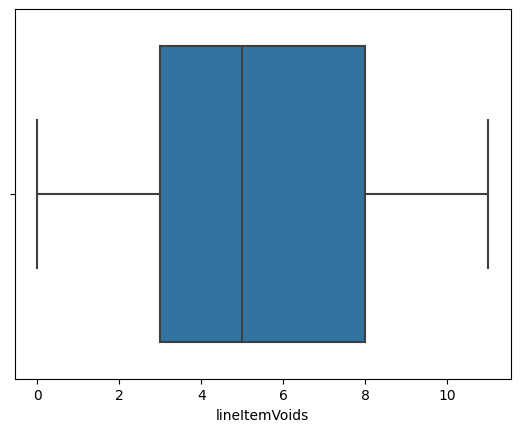

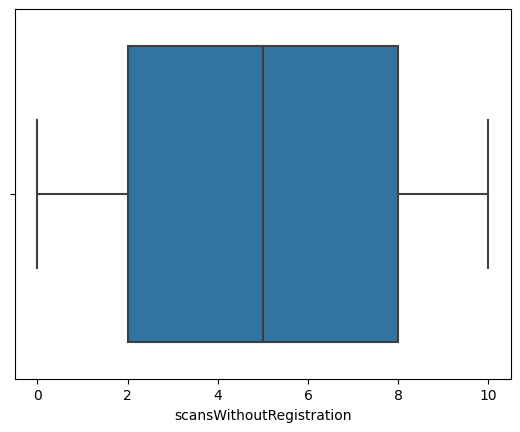

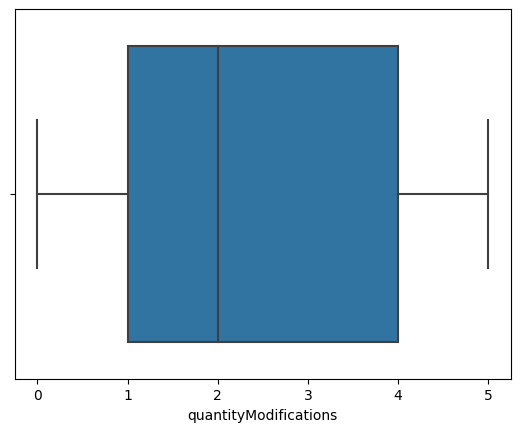

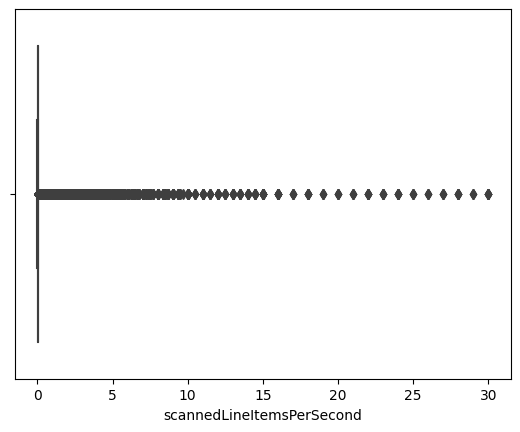

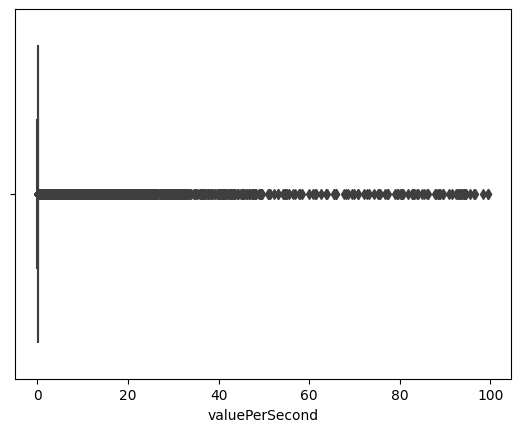

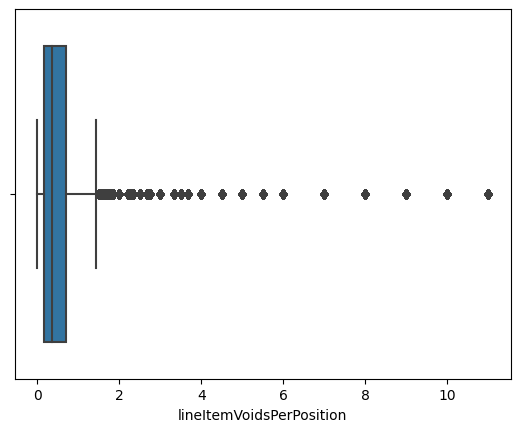

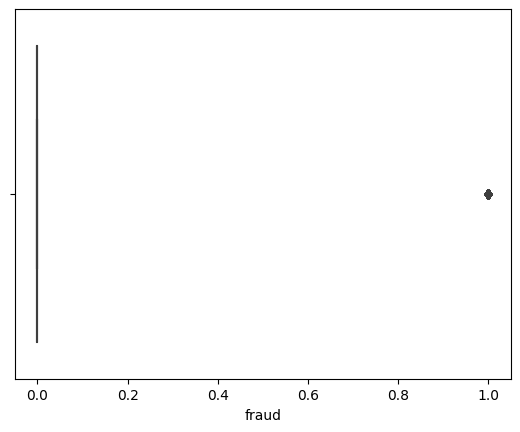

In [9]:
for column in train:
    try:
        plt.figure()
        sns.boxplot(x = train[column])
    except: 
        print(f'cannot plot {column}')

train set might have a sus outlier im not v sure abt!!!

In [10]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,350000.000000,350000.000000,350000.00000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000,350000.000000
mean,3.501743,916.110883,49.99576,5.497706,4.996954,2.498351,0.067989,0.224641,0.734113,0.048111
std,1.707213,528.927327,28.88835,3.447972,3.160901,1.707765,0.512069,1.745430,1.318847,0.214002
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,458.000000,24.92000,3.000000,2.000000,1.000000,0.008696,0.027349,0.166667,0.000000
50%,4.000000,917.000000,50.04000,5.000000,5.000000,2.000000,0.016949,0.054537,0.352941,0.000000
75%,5.000000,1375.000000,75.08000,8.000000,8.000000,4.000000,0.033937,0.108999,0.692308,0.000000
max,6.000000,1831.000000,99.99000,11.000000,10.000000,5.000000,30.000000,99.560000,11.000000,1.000000


In [11]:
validate.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.501820,915.390080,49.963535,5.487000,5.00454,2.506180,0.067051,0.218460,0.736534,0.048560
std,1.707611,527.705957,28.843899,3.446719,3.16511,1.716502,0.559830,1.719035,1.321601,0.214948
min,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,460.000000,25.070000,3.000000,2.00000,1.000000,0.008666,0.027217,0.160000,0.000000
50%,3.000000,912.000000,50.015000,5.000000,5.00000,3.000000,0.016949,0.054480,0.352941,0.000000
75%,5.000000,1373.000000,74.830000,8.000000,8.00000,4.000000,0.033582,0.108459,0.692308,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.00000,5.000000,30.000000,99.710000,11.000000,1.000000


In [12]:
test.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.507370,914.271600,49.99447,5.493670,5.01297,2.498250,0.068596,0.215053,0.738478,0.045640
std,1.709349,528.795903,28.83755,3.447233,3.17281,1.705235,0.528764,1.608869,1.324532,0.208704
min,1.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000546,0.000000,0.000000,0.000000
25%,2.000000,455.000000,24.91000,3.000000,2.00000,1.000000,0.008642,0.027421,0.166667,0.000000
50%,4.000000,913.000000,50.06000,5.000000,5.00000,2.000000,0.016911,0.054641,0.357143,0.000000
75%,5.000000,1373.000000,74.94000,8.000000,8.00000,4.000000,0.033994,0.109764,0.692308,0.000000
max,6.000000,1831.000000,99.99000,11.000000,10.00000,5.000000,29.000000,98.260000,11.000000,1.000000


See the distribution of fraud class across all 3 sets to ensure they are roughly the same

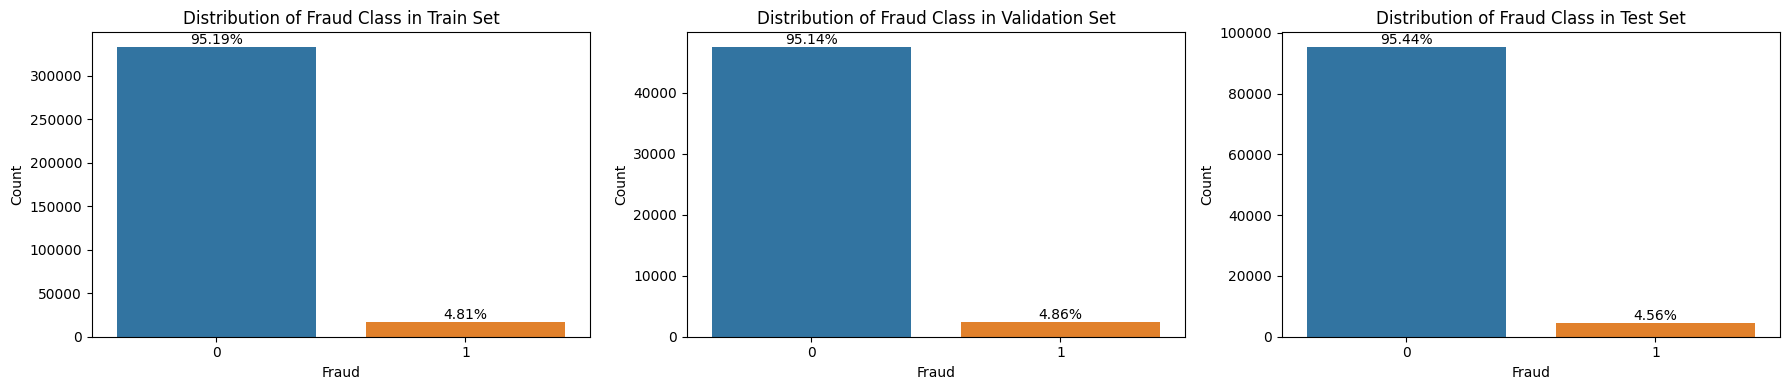

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# for train set
ax = sns.countplot(x='fraud', data=train, ax=axes[0])
total = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
ax.set_title("Distribution of Fraud Class in Train Set")
ax.set_xlabel("Fraud")
ax.set_ylabel("Count")

# for validation set
ax = sns.countplot(x='fraud', data=validate, ax=axes[1])
total = len(validate)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
ax.set_title("Distribution of Fraud Class in Validation Set")
ax.set_xlabel("Fraud")
ax.set_ylabel("Count")

# for test set
ax = sns.countplot(x='fraud', data=test, ax=axes[2])
total = len(test)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
ax.set_title("Distribution of Fraud Class in Test Set")
ax.set_xlabel("Fraud")
ax.set_ylabel("Count")

# Adjust spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


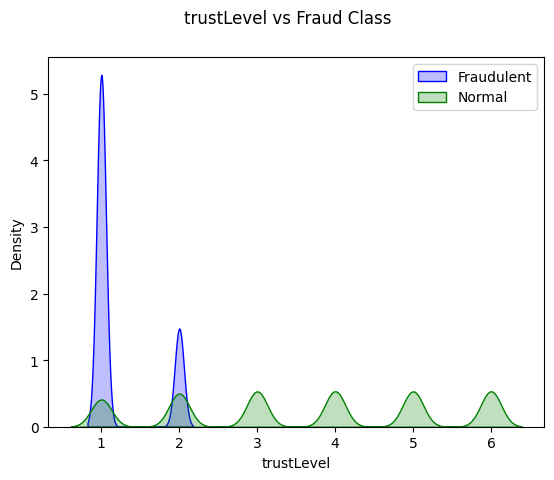

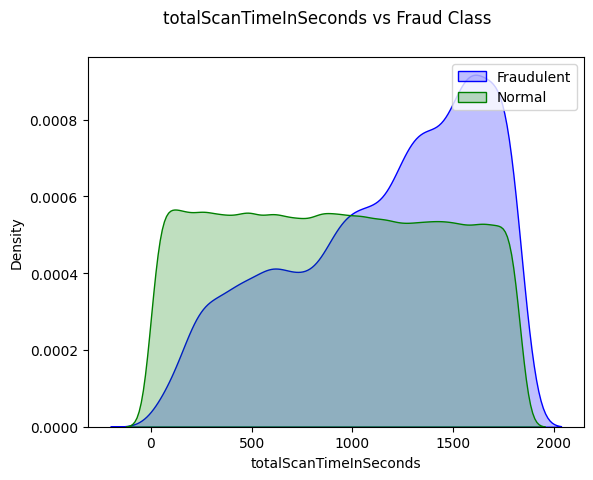

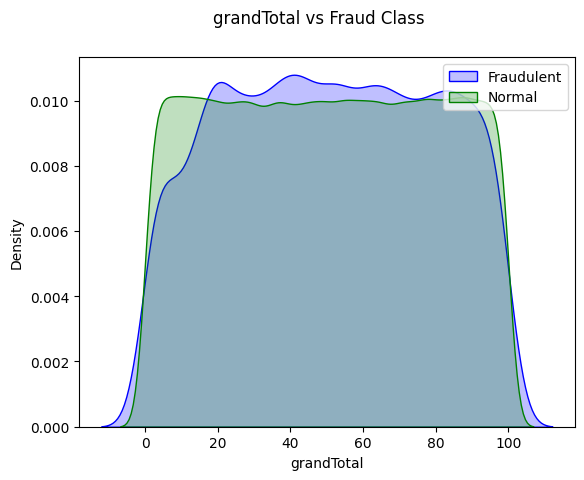

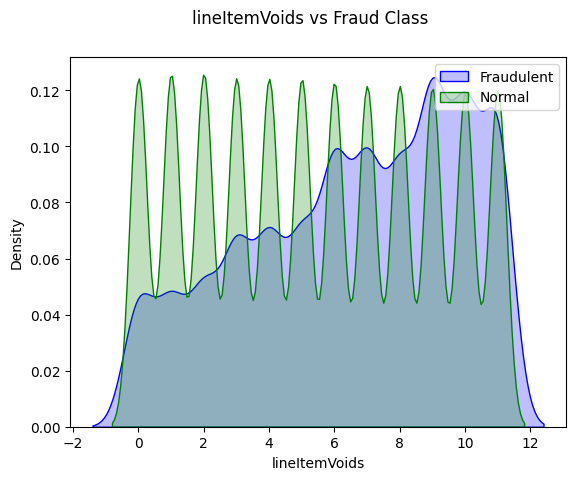

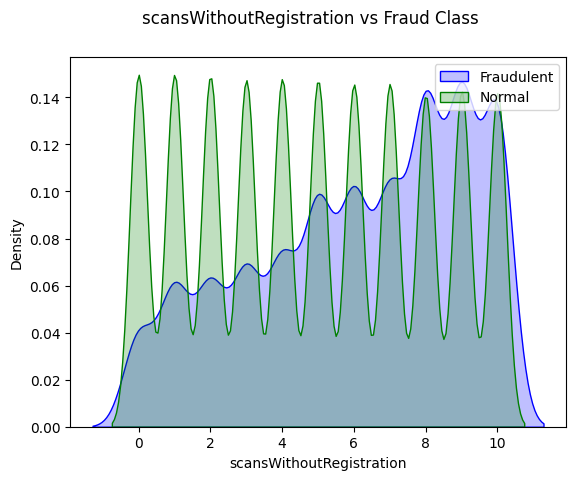

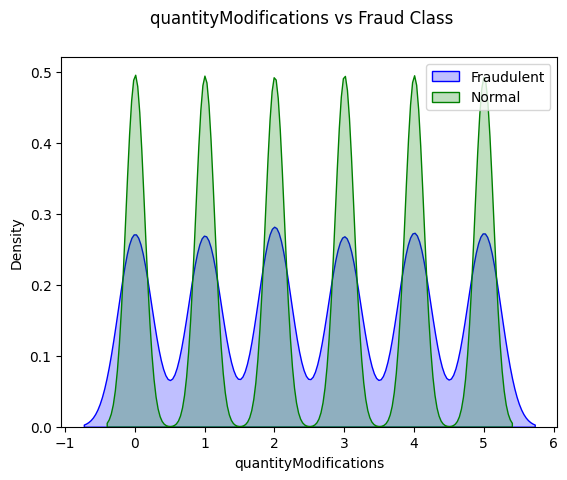

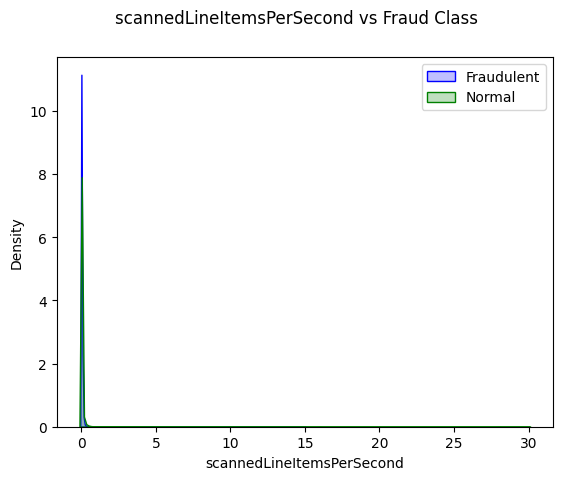

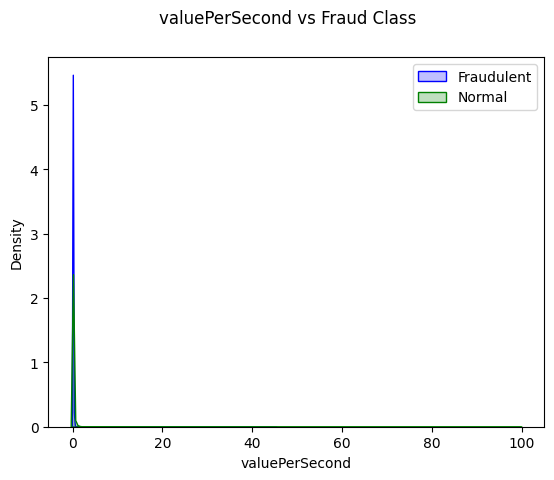

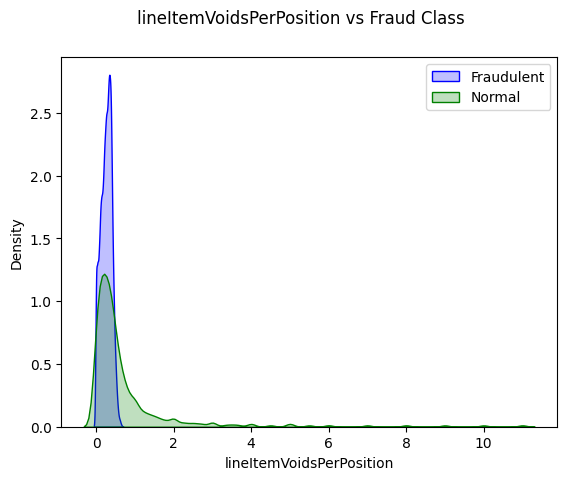

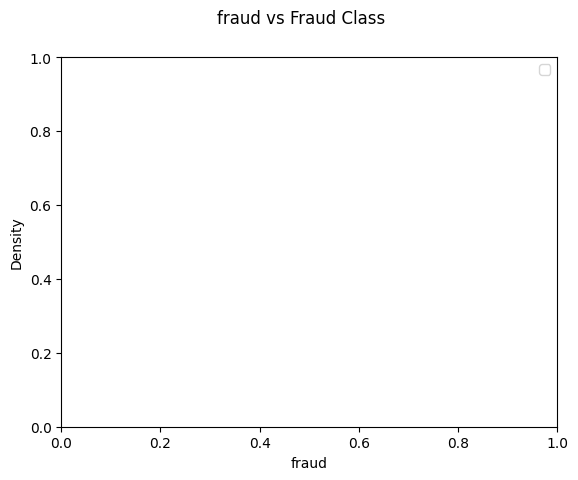

In [14]:
for i in train.columns:

    fig, ax = plt.subplots()

    sns.kdeplot(train[train["fraud"]==1][i], shade=True, color="blue", label="Fraudulent", ax=ax)
    sns.kdeplot(train[train["fraud"]==0][i], shade=True, color="green", label="Normal", ax=ax)

    ax.set_xlabel(i)
    ax.set_ylabel("Density")

    fig.suptitle(f"{i} vs Fraud Class")
    plt.legend()

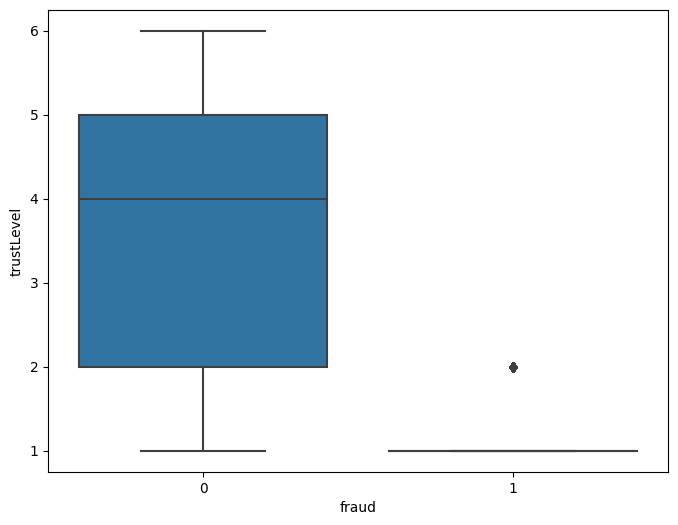

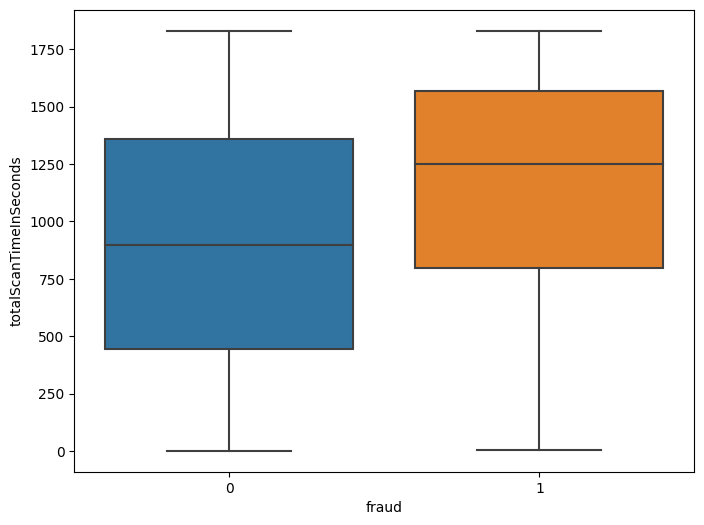

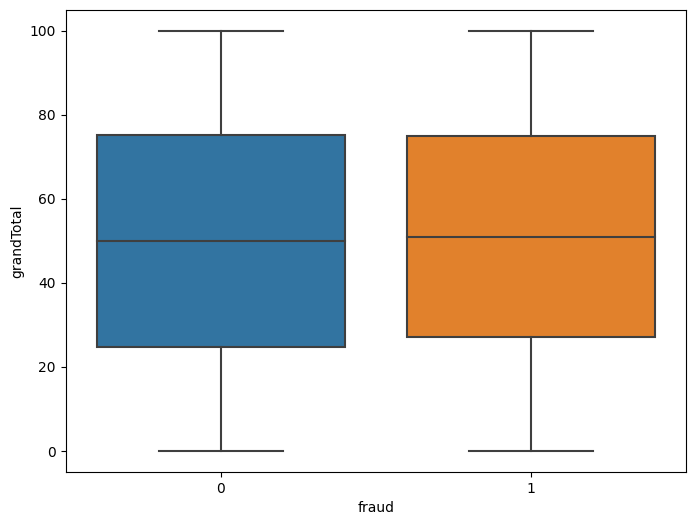

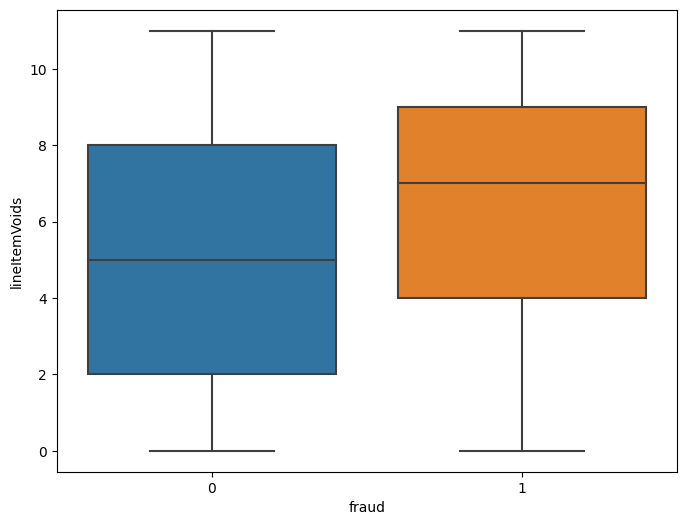

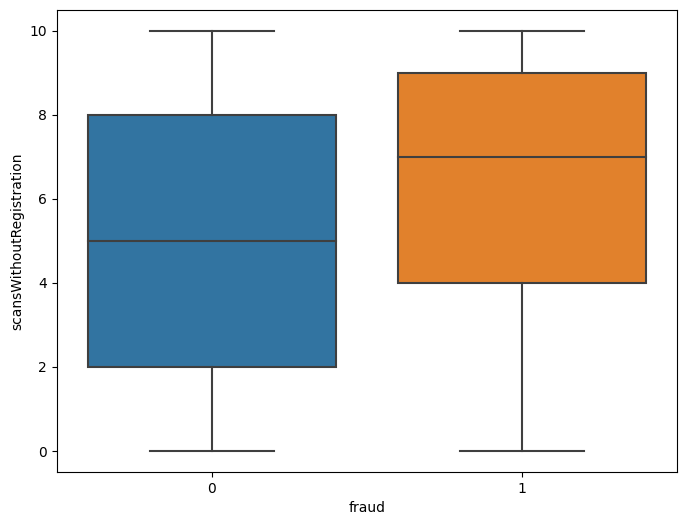

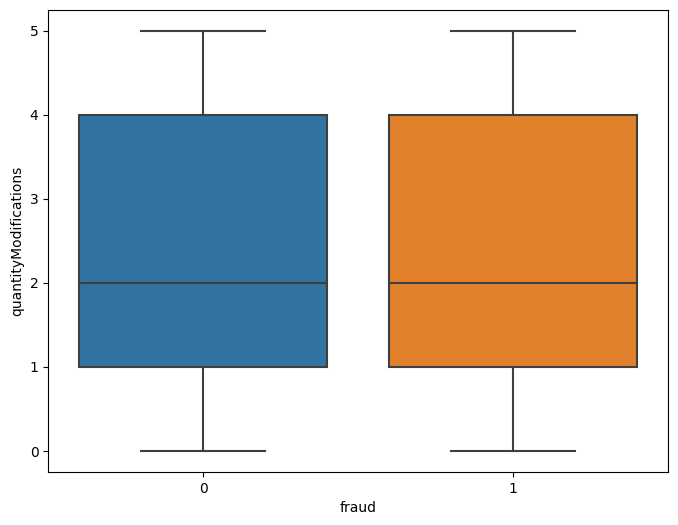

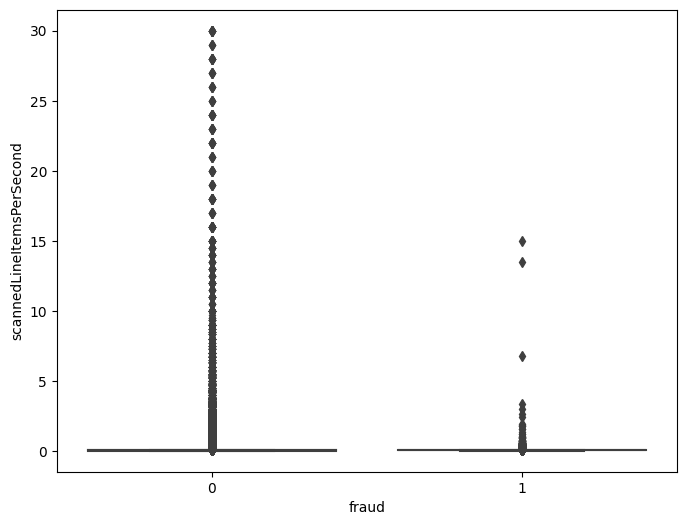

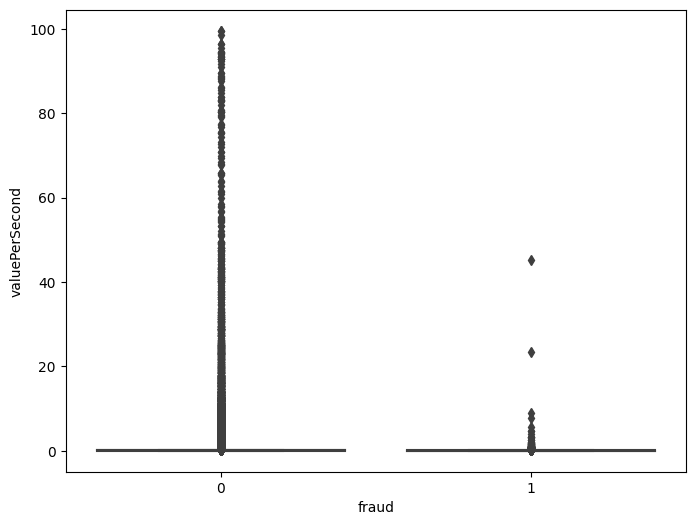

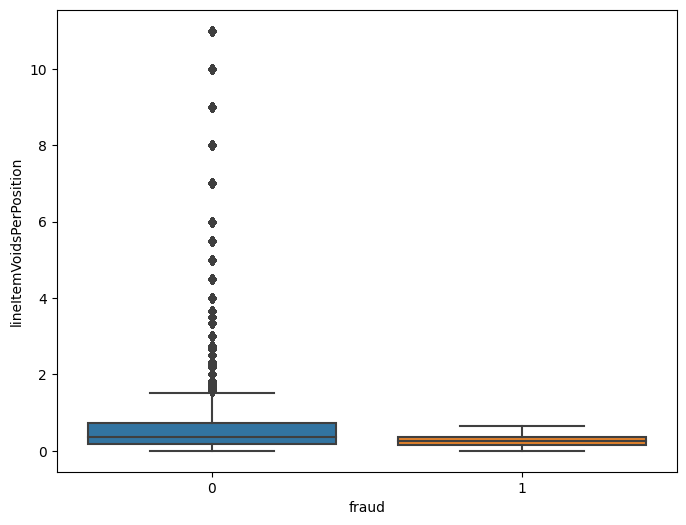

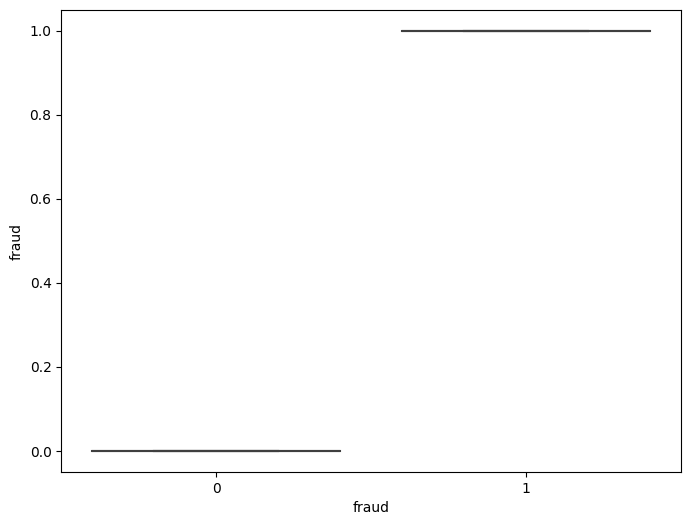

In [15]:
for i in train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, x='fraud', y=i)
    plt.show()

Correlation analysis?

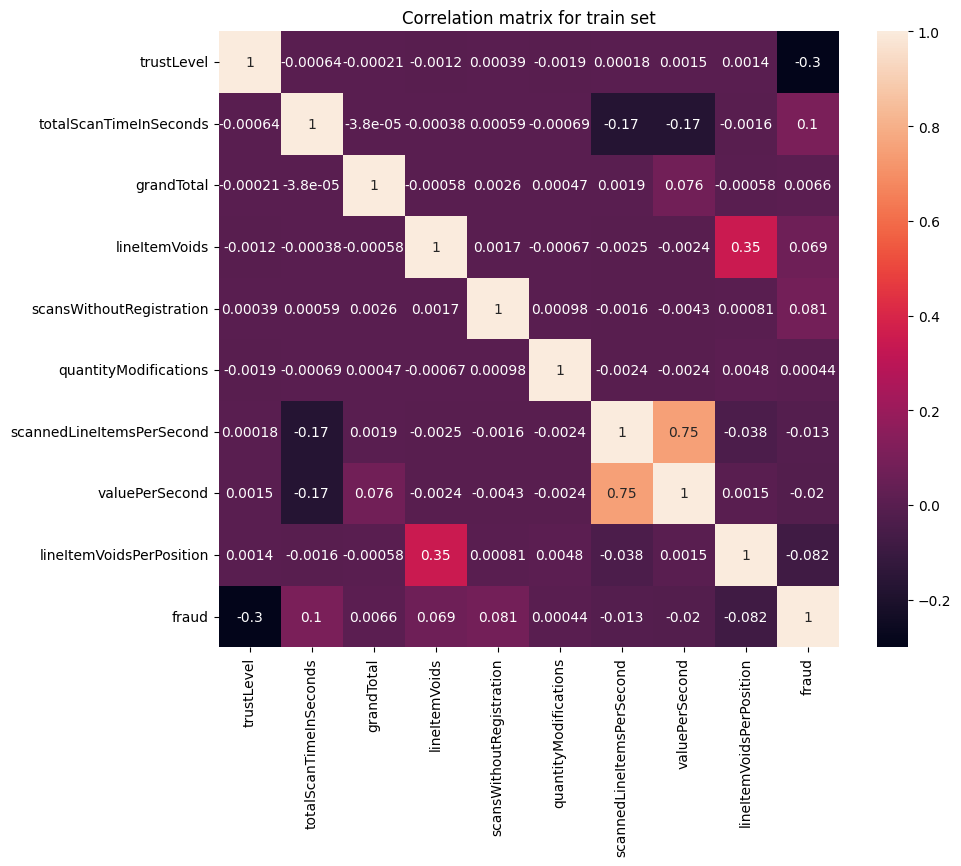

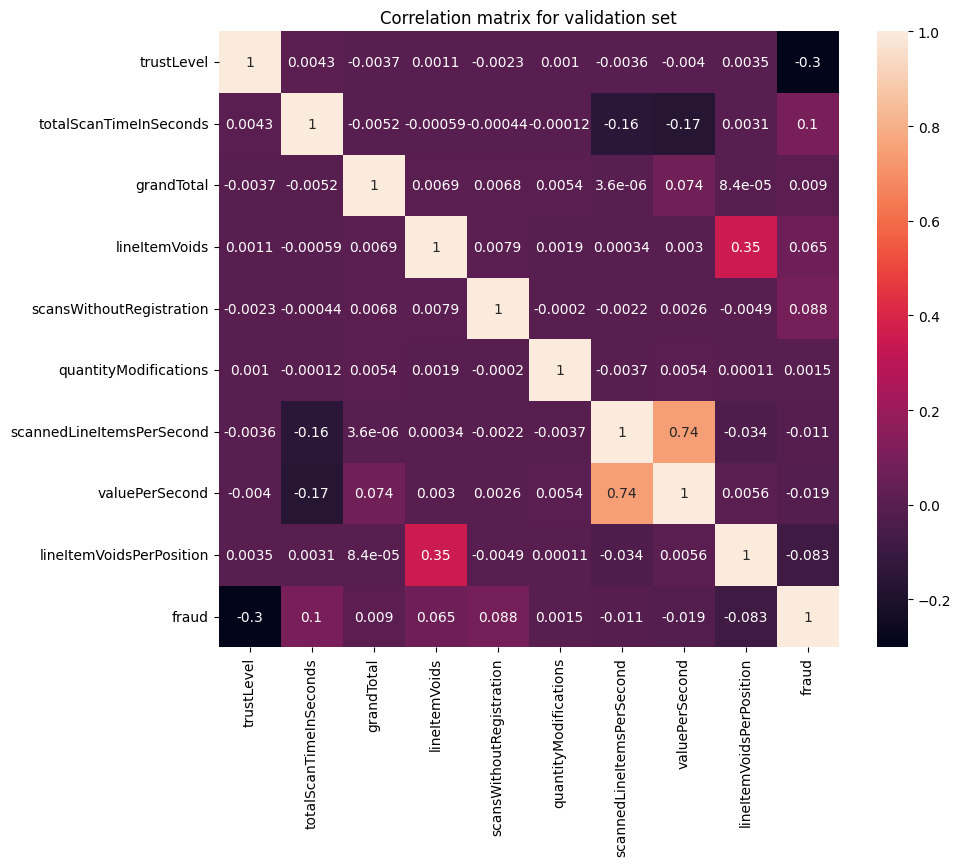

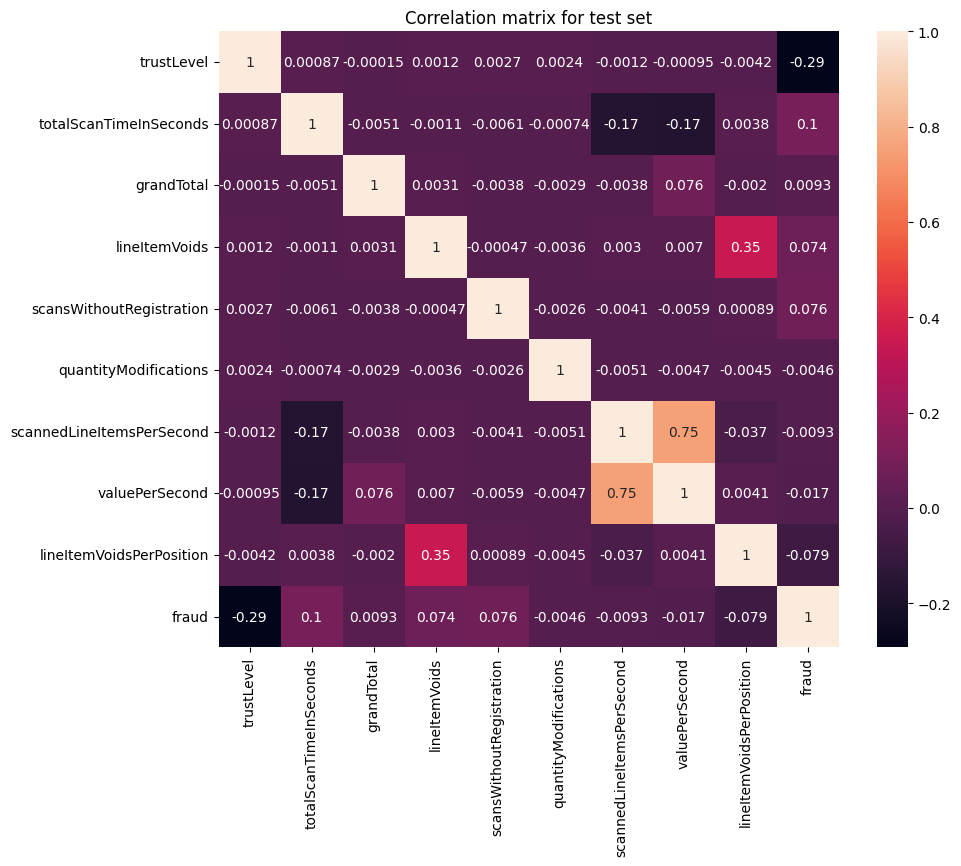

In [16]:
# Plot the correlation matrix for the train set
plt.figure(figsize=(10, 8))
correlation_matrix_train = train.corr()
sns.heatmap(correlation_matrix_train, annot=True)
plt.title('Correlation matrix for train set')
plt.show()

# Plot the correlation matrix for the validation set
plt.figure(figsize=(10, 8))
correlation_matrix_validate = validate.corr()
sns.heatmap(correlation_matrix_validate, annot=True)
plt.title('Correlation matrix for validation set')
plt.show()

# Plot the correlation matrix for the test set
plt.figure(figsize=(10, 8))
correlation_matrix_test = test.corr()
sns.heatmap(correlation_matrix_test, annot=True)
plt.title('Correlation matrix for test set')
plt.show()


<Axes: xlabel='trustLevel'>

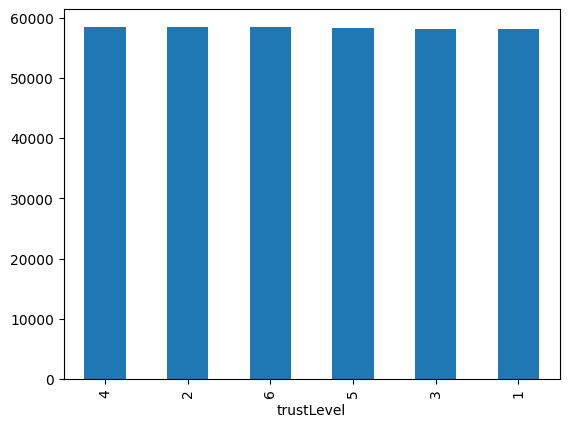

In [17]:
# distribution of trust level
train.trustLevel.value_counts().plot(kind="bar")

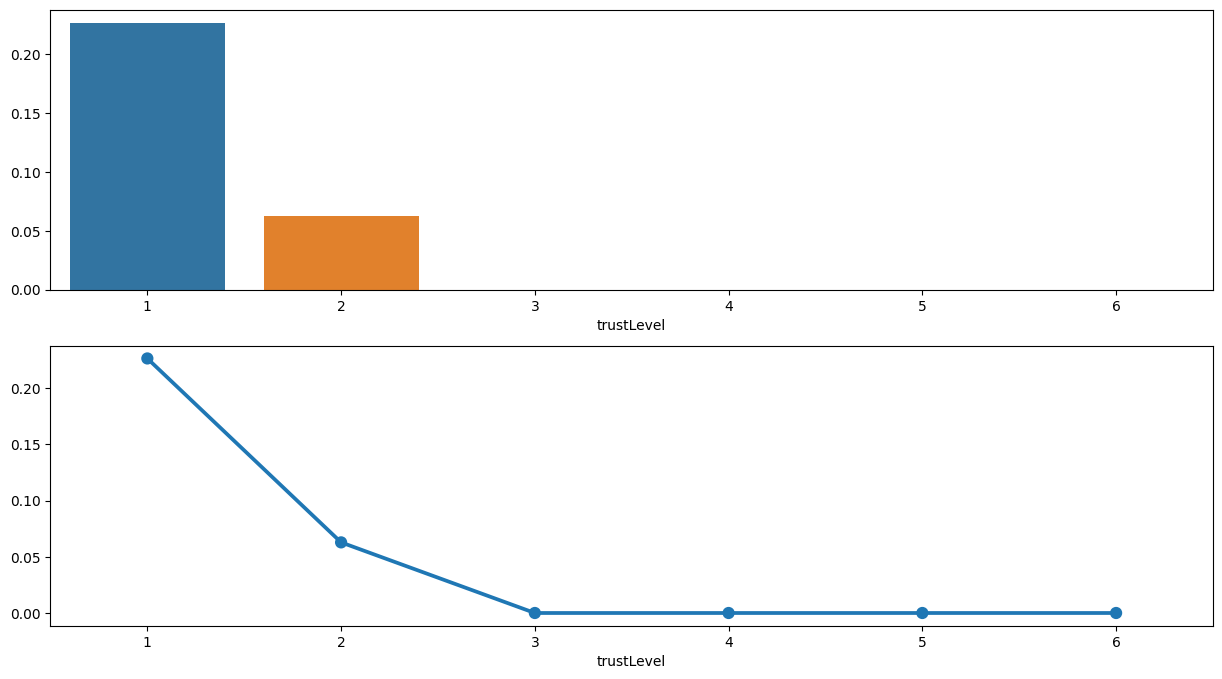

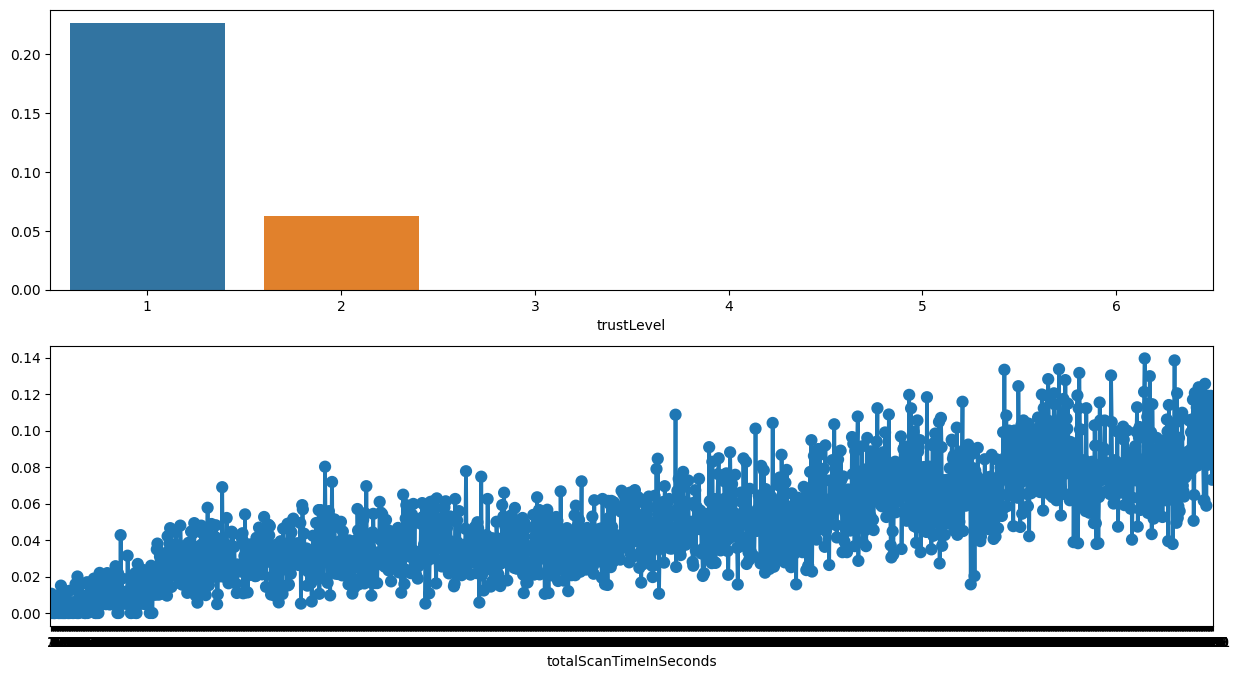

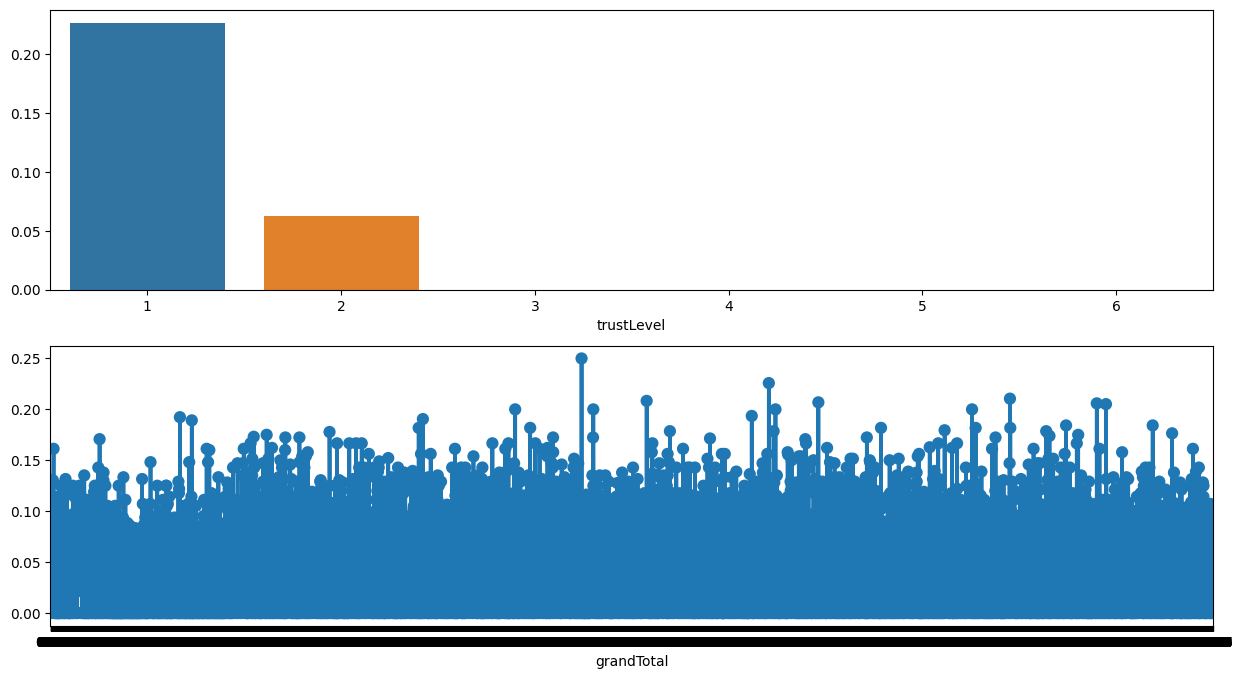

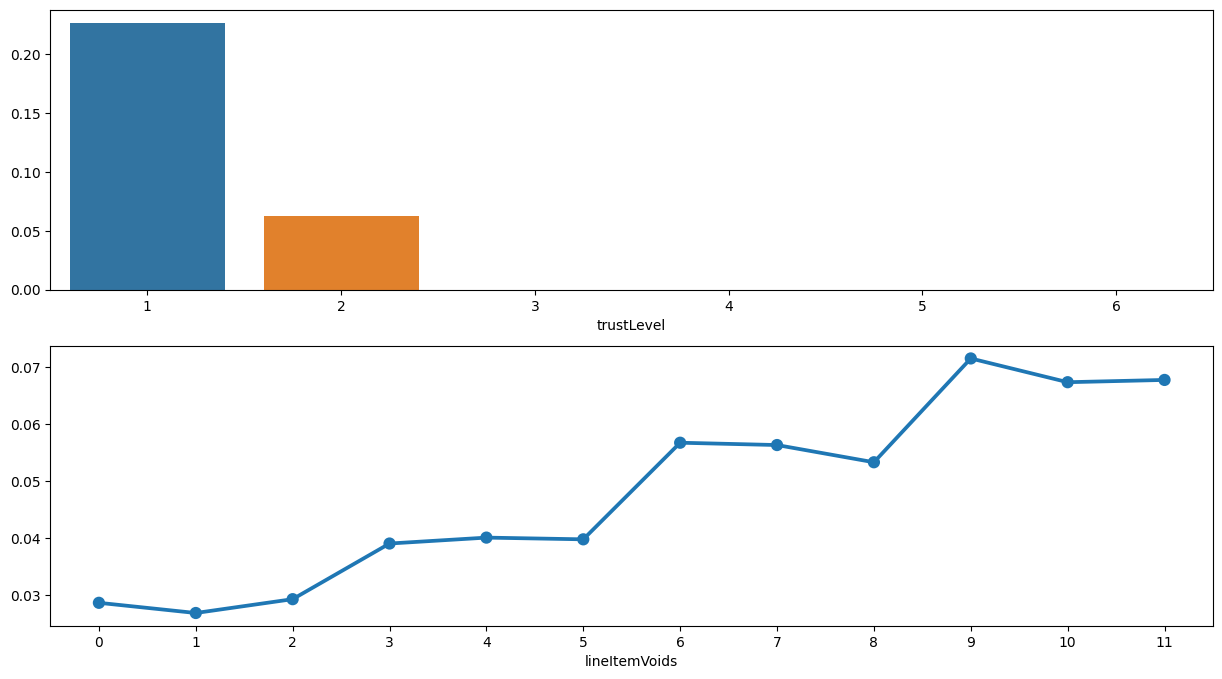

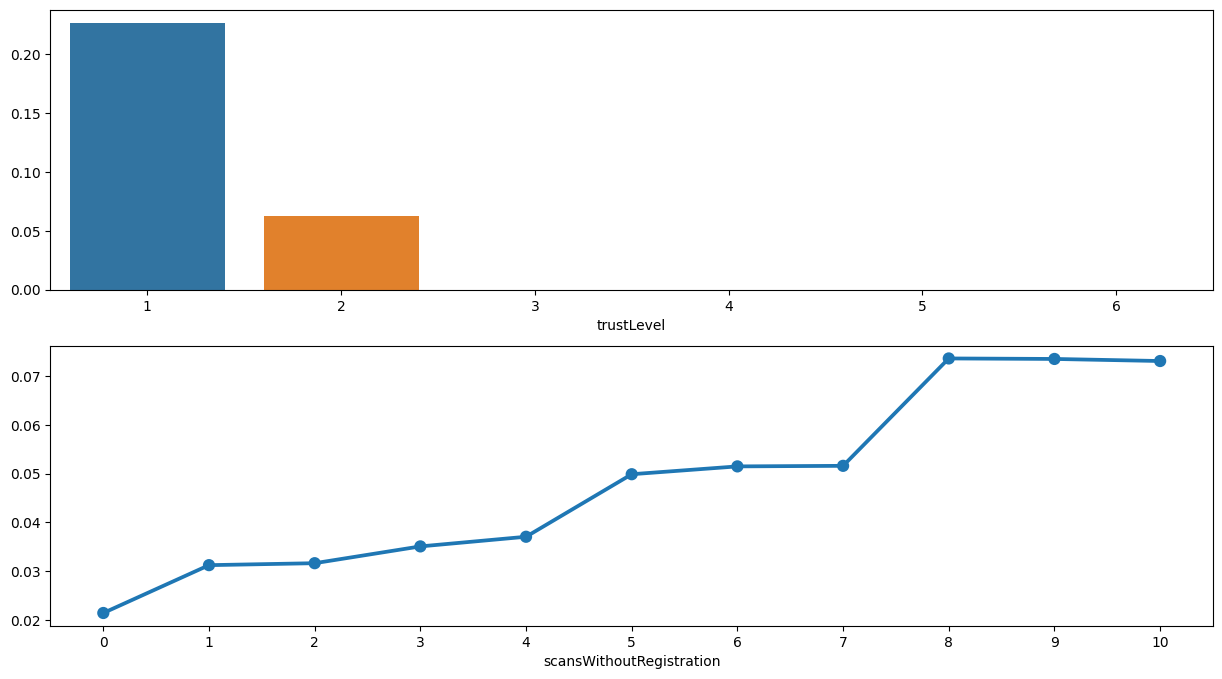

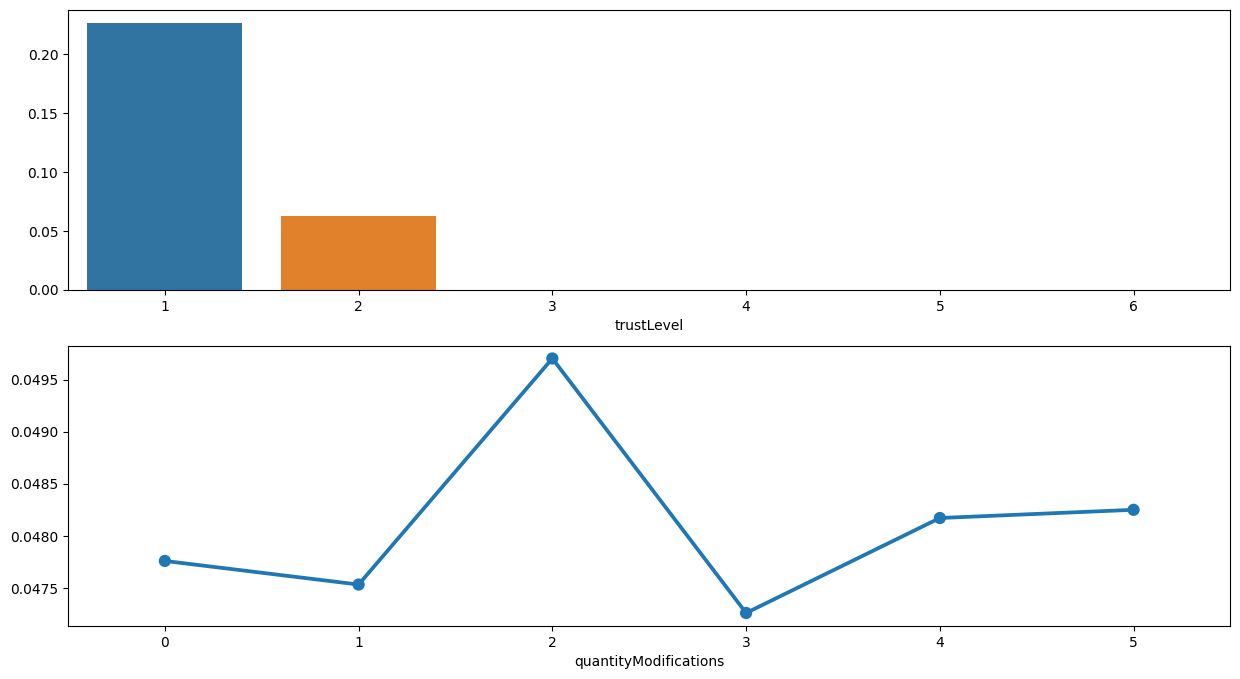

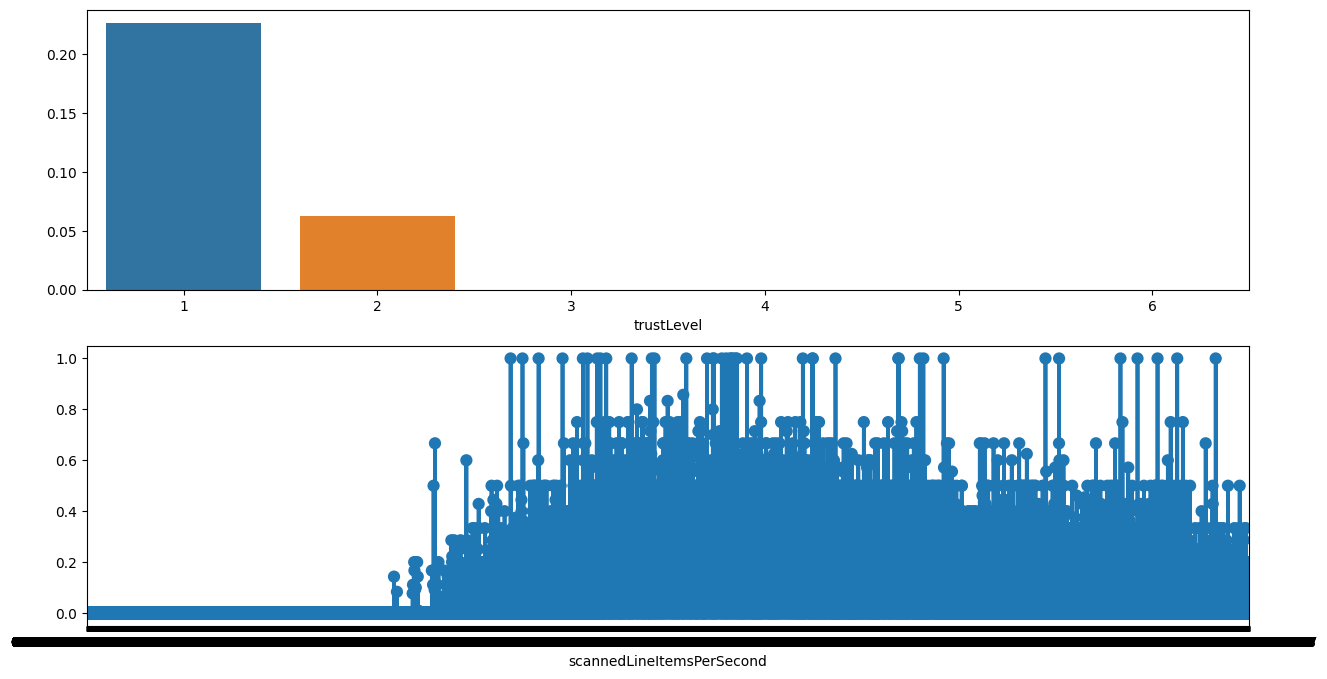

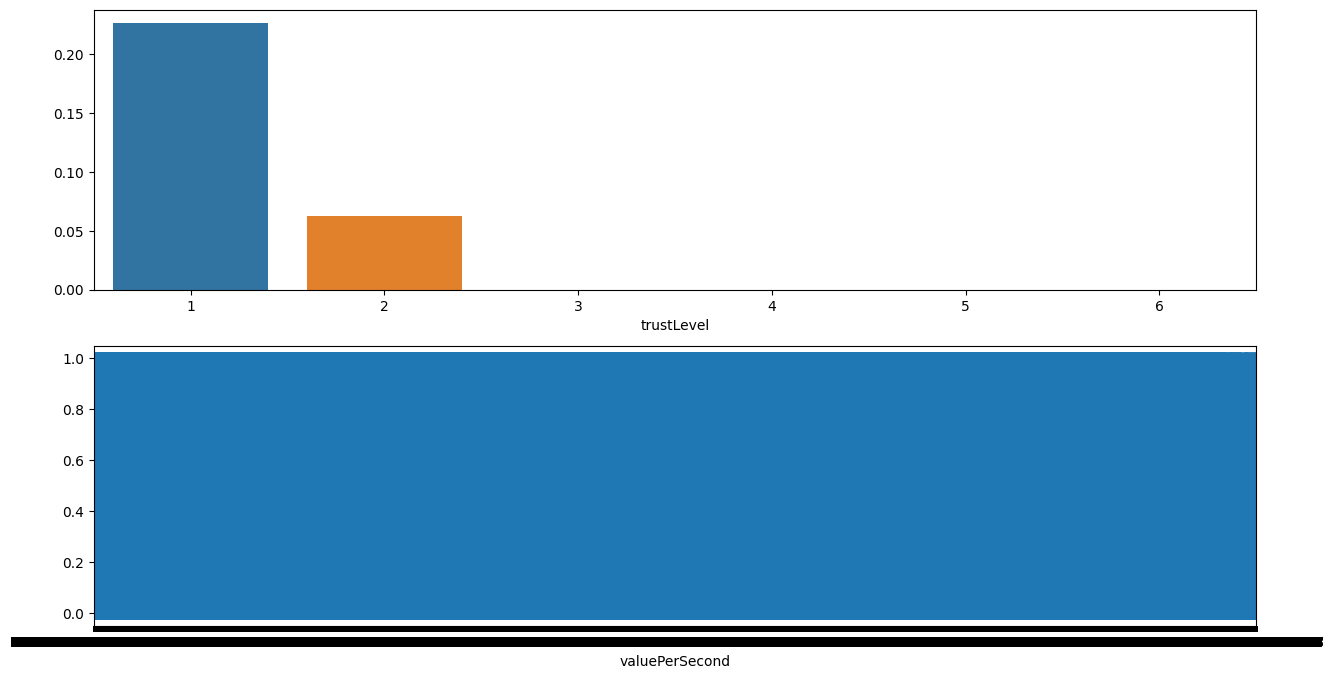

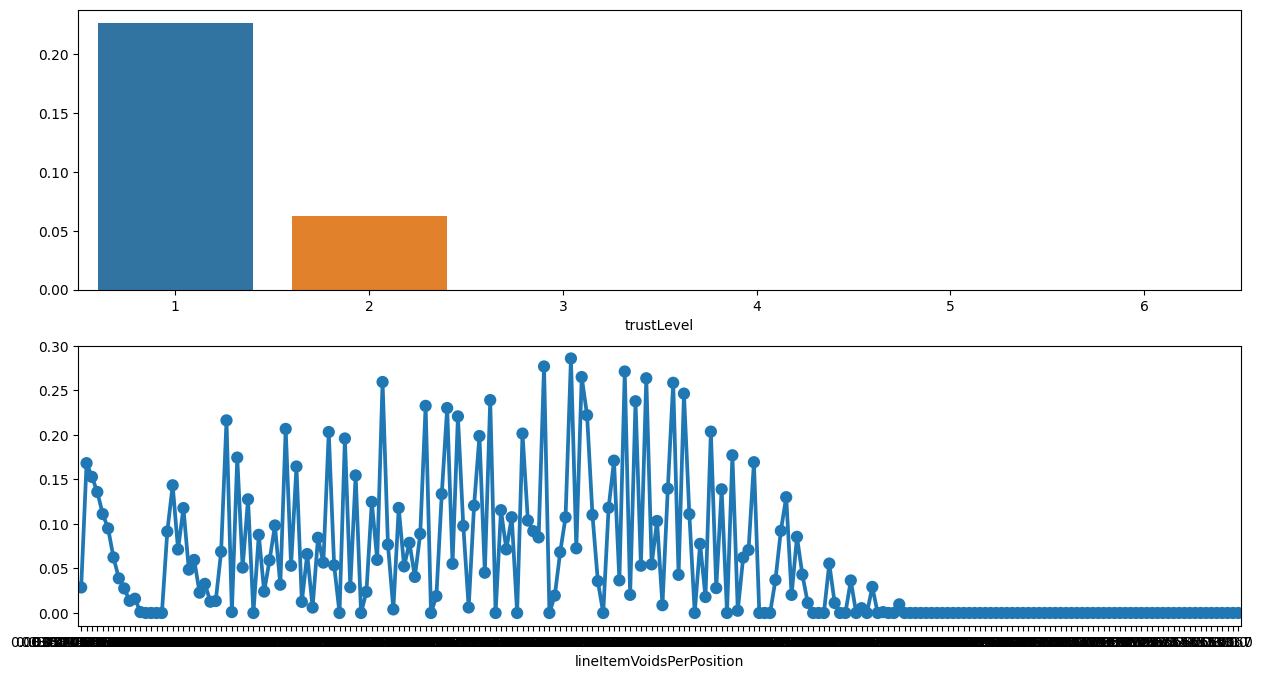

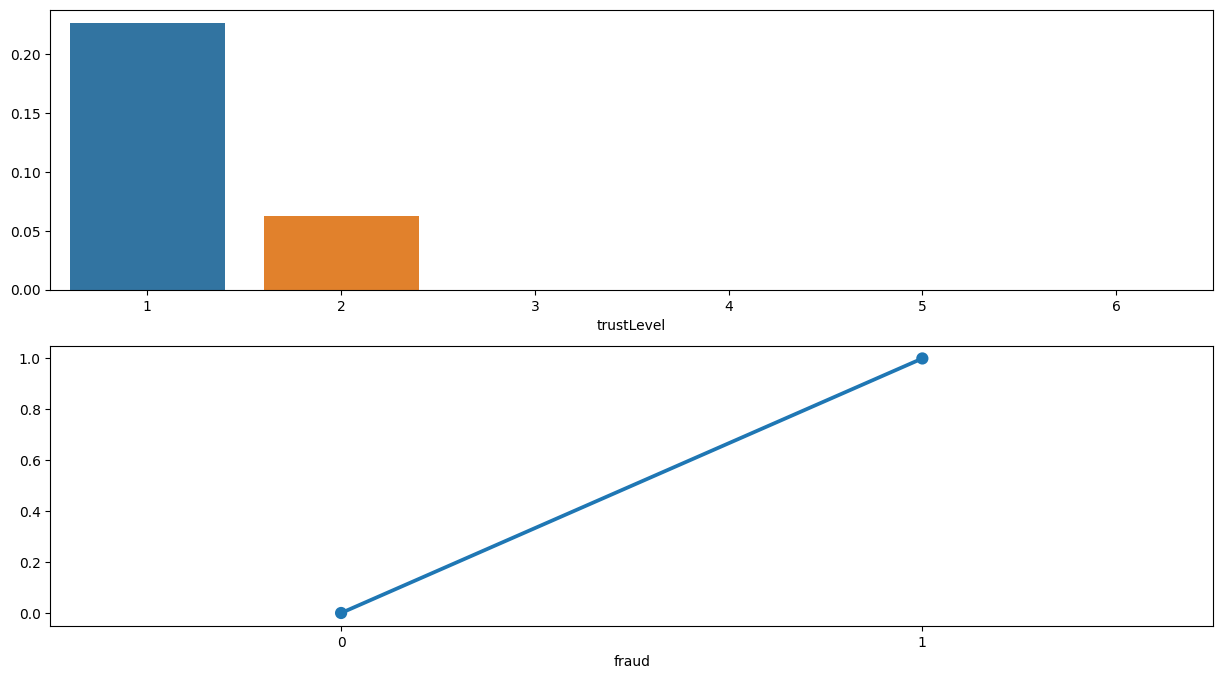

In [18]:
# trust level against other things
for i in train.columns:
    trust_fraud = train.groupby('trustLevel')['fraud'].mean()
    other = train.groupby(i)['fraud'].mean()
    fig, ax = plt.subplots(2, 1, figsize=(15,8))
    sns.barplot(x=trust_fraud.index, y=trust_fraud.values, ax=ax[0])
    sns.pointplot(x=other.index, y=other.values, ax=ax[1])

possible features we can consider:
- average scan time per item: totalScanTimeInSeconds / grandTotal